In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [5]:
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")


In [9]:
df = pd.read_csv("Netflix Dataset.csv")

In [10]:
print(df.shape)
print(df.info())
df.head

(7789, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


<bound method NDFrame.head of      Show_Id Category                                    Title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                    07:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7784   s7783    Movie                                     Zozo   
7785   s7784    Movie                                   Zubaan   
7786   s7785    Movie                        Zulu Man in Japan   
7787   s7786  TV Show                    Zumbo's Just Desserts   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               Director                                               Cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7784        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7785        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7786                NaN                                            Nasty C   
7787                NaN                         Adriano Zumbo, Rachel Khoo   
7788           Sam Dunn                                                NaN   

                                                Country        Release_Date  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7784  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7785                                              India       March 2, 2019   
7786                                                NaN  September 25, 2020   
7787                                          Australia    October 31, 2020   
7788              United Kingdom, Canada, United States       March 1, 2020   

     Rating   Duration                                               Type  \
0     TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1     TV-MA     93 min                       Dramas, International Movies   
2         R     78 min                Horror Movies, International Movies   
3     PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4     PG-13    123 min                                             Dramas   
...     ...        ...                                                ...   
7784  TV-MA     99 min                       Dramas, International Movies   
7785  TV-14    111 min     Dramas, International Movies, Music & Musicals   
7786  TV-MA     44 min  Documentaries, International Movies, Music & M...   
7787  TV-PG   1 Season                 International TV Shows, Reality TV   
7788  TV-MA     90 min                    Documentaries, Music & Musicals   

                                            Description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
...               

In [11]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['year_added'] = df['Release_Date'].dt.year


for col in ['Director','Cast','Country','Rating','Duration','Type']:
    df[col] = df[col].fillna("Unknown")
def split_duration(x):
    try:
        val, typ = x.split()
        return int(val), typ
    except:
        return None, None

df['duration_value'], df['duration_type'] = zip(*df['Duration'].apply(split_duration))
df['primary_genre'] = df['Type'].apply(lambda x: x.split(",")[0] if x!="Unknown" else "Unknown")

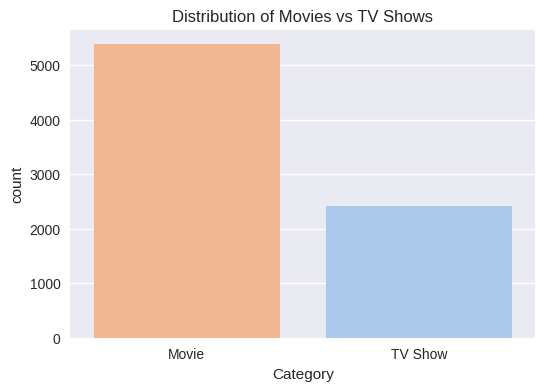

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, hue='Category', palette="pastel", legend=False)
plt.title("Distribution of Movies vs TV Shows")
plt.show()

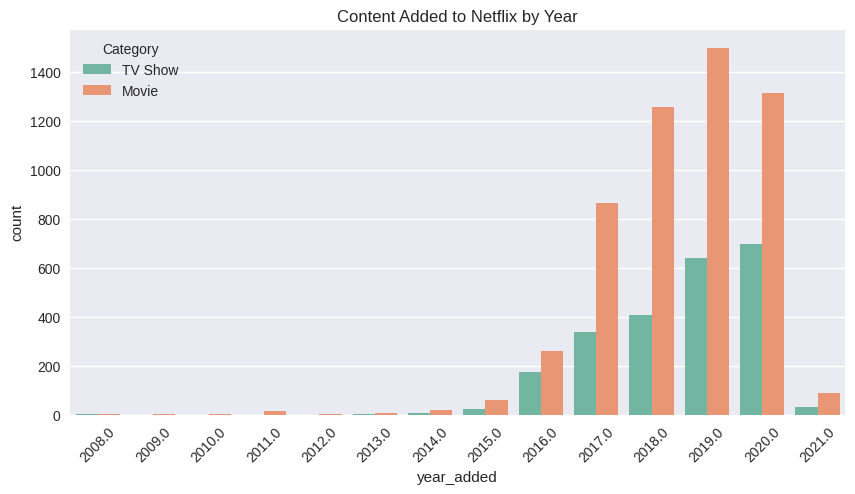

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', hue='Category', palette="Set2")
plt.title("Content Added to Netflix by Year")
plt.xticks(rotation=45)
plt.show()

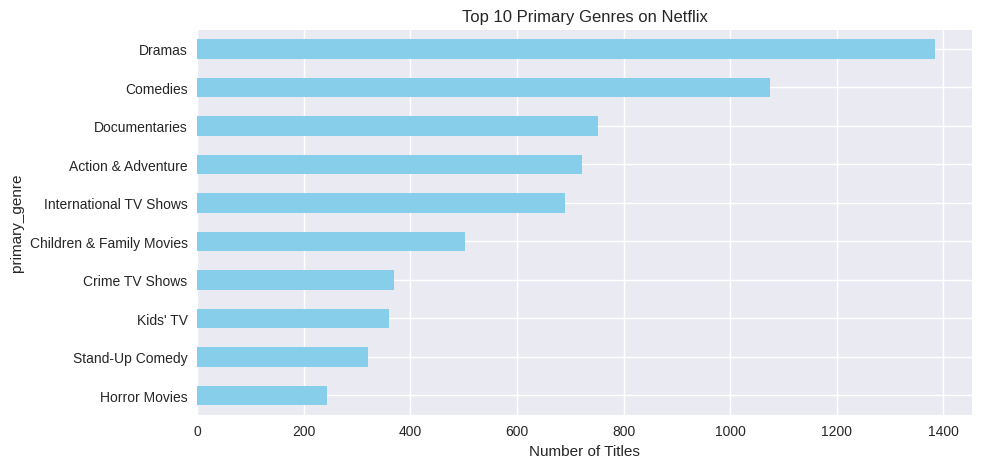

In [14]:

plt.figure(figsize=(10,5))
df['primary_genre'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Primary Genres on Netflix")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()

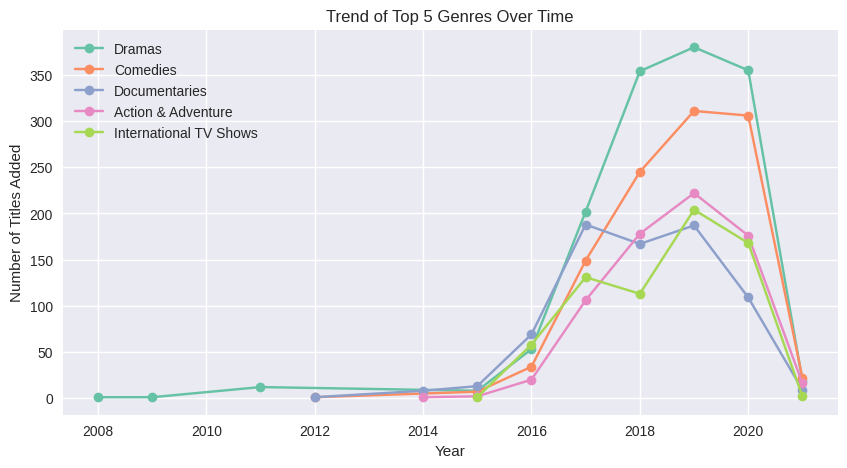

In [15]:
top_genres = df['primary_genre'].value_counts().head(5).index
plt.figure(figsize=(10,5))
for g in top_genres:
    trend = df[df['primary_genre']==g].groupby('year_added').size()
    plt.plot(trend.index, trend.values, marker='o', label=g)
plt.title("Trend of Top 5 Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.legend()
plt.show()


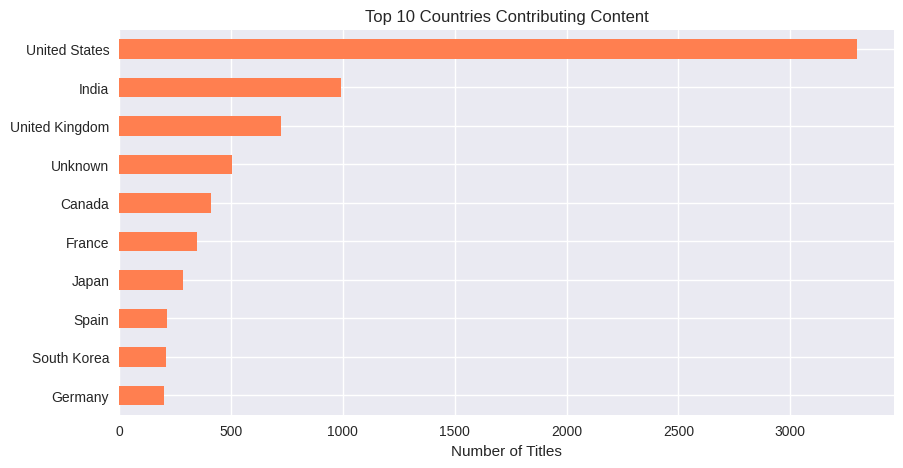

In [16]:
country_series = df['Country'].dropna().apply(lambda x: [c.strip() for c in x.split(",")])
all_countries = Counter([c for sub in country_series for c in sub])

top_countries = pd.Series(all_countries).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind='barh', color='coral')
plt.title("Top 10 Countries Contributing Content")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()

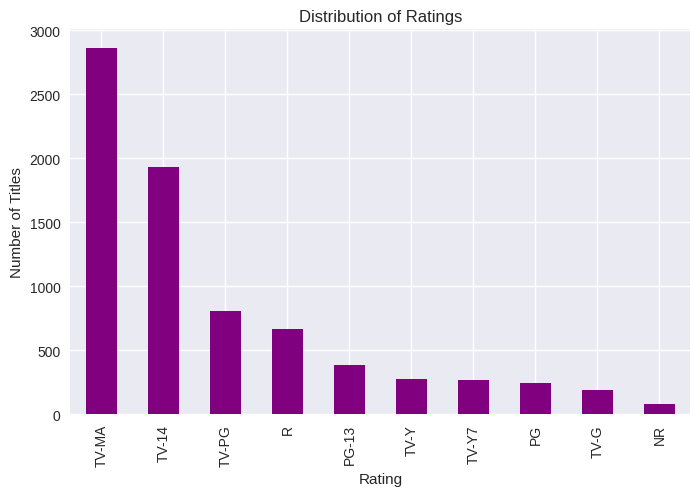

In [17]:
plt.figure(figsize=(8,5))
df['Rating'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Distribution of Ratings")
plt.ylabel("Number of Titles")
plt.show()

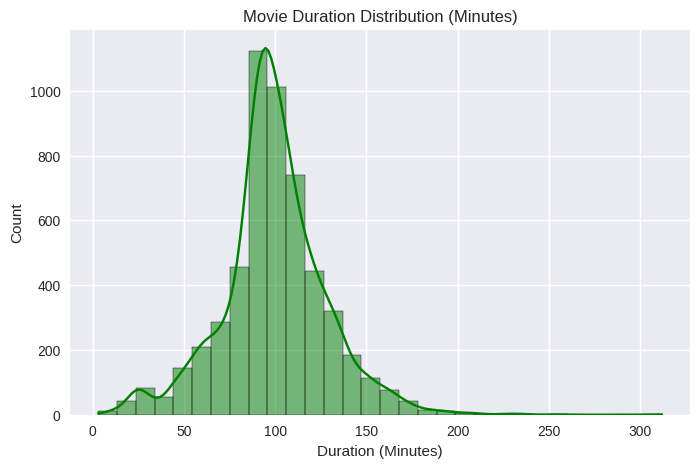

In [18]:
movies = df[df['Category']=="Movie"]
plt.figure(figsize=(8,5))
sns.histplot(movies['duration_value'].dropna(), bins=30, kde=True, color='green')
plt.title("Movie Duration Distribution (Minutes)")
plt.xlabel("Duration (Minutes)")
plt.show()


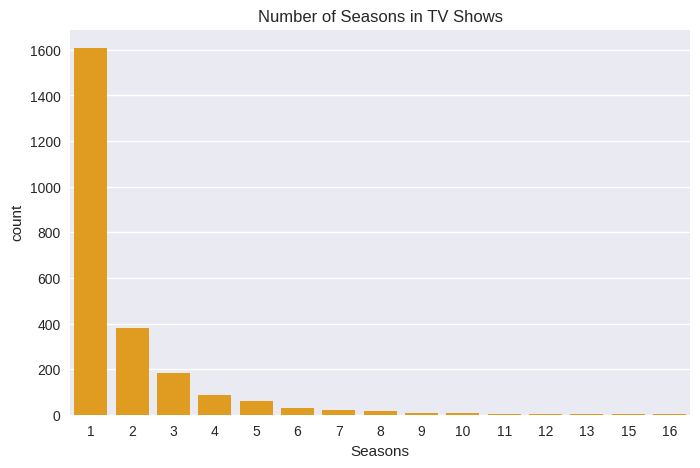

In [19]:
shows = df[df['Category']=="TV Show"]
plt.figure(figsize=(8,5))
sns.countplot(data=shows, x='duration_value', color='orange')
plt.title("Number of Seasons in TV Shows")
plt.xlabel("Seasons")
plt.show()


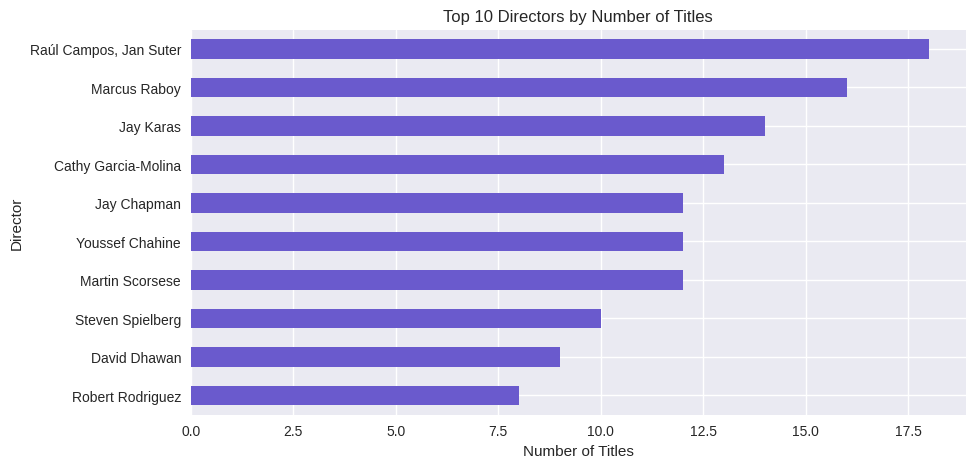

In [20]:
plt.figure(figsize=(10,5))
df['Director'].value_counts().drop("Unknown").head(10).plot(kind='barh', color='slateblue')
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()

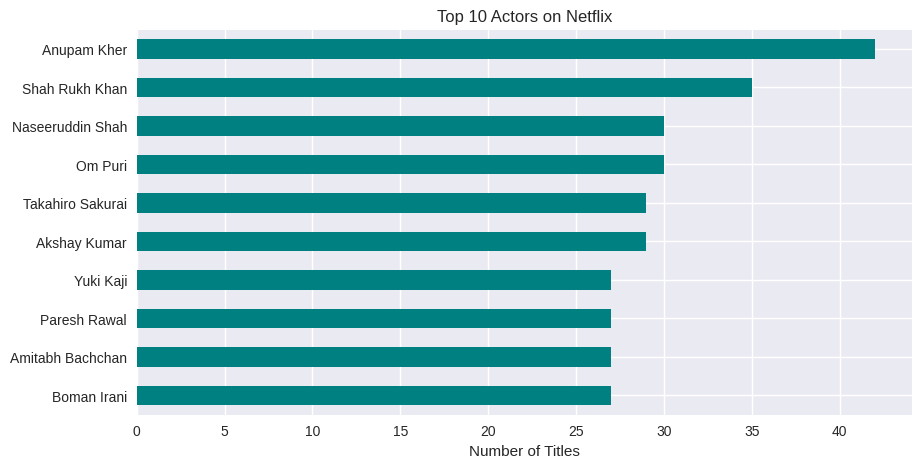

In [21]:
cast_series = df['Cast'].dropna().apply(lambda x: [c.strip() for c in x.split(",")])
all_cast = Counter([c for sub in cast_series for c in sub if c!="Unknown"])
top_cast = pd.Series(all_cast).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_cast.plot(kind='barh', color='teal')
plt.title("Top 10 Actors on Netflix")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()

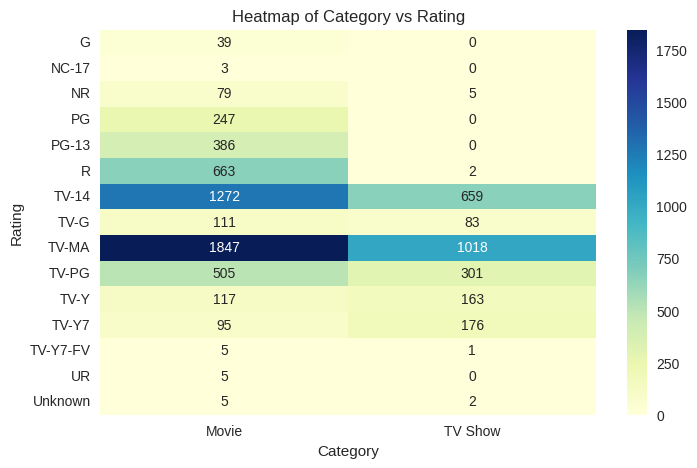

In [22]:
plt.figure(figsize=(8,5))
pivot = pd.crosstab(df['Rating'], df['Category'])
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Category vs Rating")
plt.show()
